### Eigenfaces
This notebook goes over a quick example of how we can decompose a dataset of images into a set of simple components. <br>
[Eigenface](https://en.wikipedia.org/wiki/Eigenface)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
# Define image size
image_size = 48

# Load image matrix
images = np.load("faces.npy")
print(img_matrix.shape)

(10000, 2304)


In [35]:
print("There are %d greyscale images" % img_matrix.shape[0])

There are 10000 greyscale images


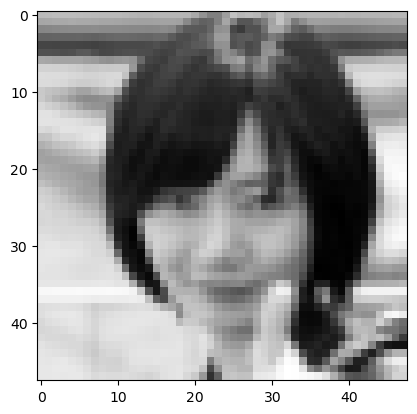

In [36]:
# Plot out an example image
_ = plt.imshow(img_matrix[0].reshape(image_size, image_size), cmap='gray')

In [11]:
# Use SVD to decompose the image matrix
# Singular value decomposition

# This will take a bit of time
U, S, Vh = np.linalg.svd(img_matrix, full_matrices=False)

In [37]:
print(Vh.shape)

(2304, 2304)


In [38]:
print("There are a total of %d components" % Vh.shape[0])

There are a total of 2304 components


## Visualize the Eigenfaces
Lets have a look at some of the components that we can decompose our faces into

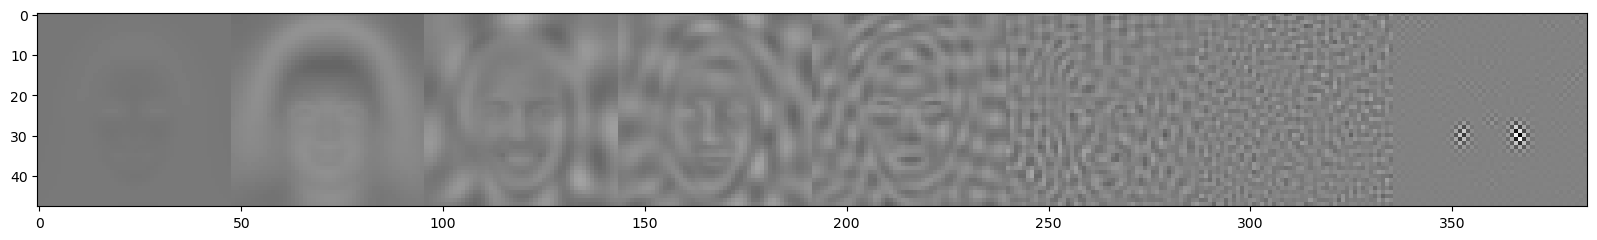

In [40]:
# Select a few of the components
imgs_indx = [0, 10, 50, 100, 200, 500, 1000, 2303]

# The components of the dataset is contained in the Vh matrix
# Reshape image stack to be one long row
img_to_view = Vh[imgs_indx].reshape(-1, image_size, image_size).transpose(1, 0, 2).reshape(image_size, -1)

# Plot images
_ = plt.figure(figsize=(20, 10))
_ = plt.imshow(img_to_view, cmap='gray')

## Reconstruct a face
Every face in the dataset can be constructed by adding a certain proportion of these components together

In [18]:
# Set the number of componets to use
# max number is image_size * image_size
components = min(10, image_size ** 2)

# Select an image to use
img_index = 999

# Reconstruct the image using a set of components
# The proportion of each component that must be added together is contain in the U matrix
img_eg = np.expand_dims(U[img_index, :components], 0) @ np.diag(S)[:components, :] @ Vh

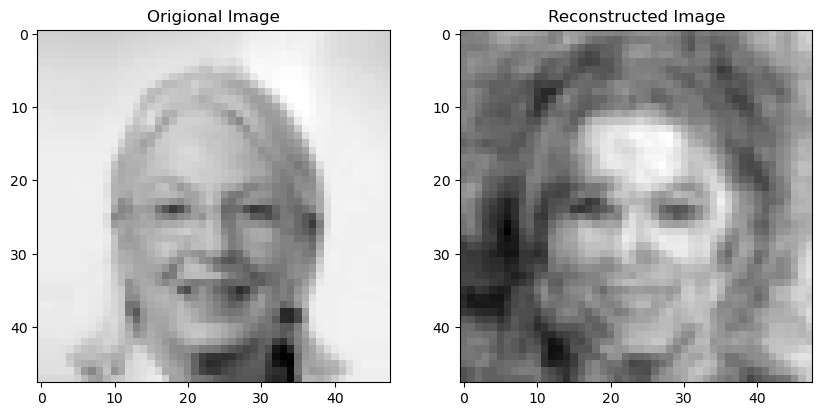

In [47]:
fig, axs = plt.subplots(1, 2)
_ = fig.set_size_inches(10, 20)

_ = axs[0].imshow(img_matrix[img_index].reshape(image_size, image_size), cmap='gray')
_ = axs[0].set_title("Origional Image")

_ = axs[1].imshow(img_eg.reshape(image_size, image_size), cmap='gray')
_ = axs[1].set_title("Reconstructed Image")


In [42]:
# Reconstruct image multiple times with different number of components 
img_all = np.tril(U[img_index]) @ np.diag(S) @ Vh

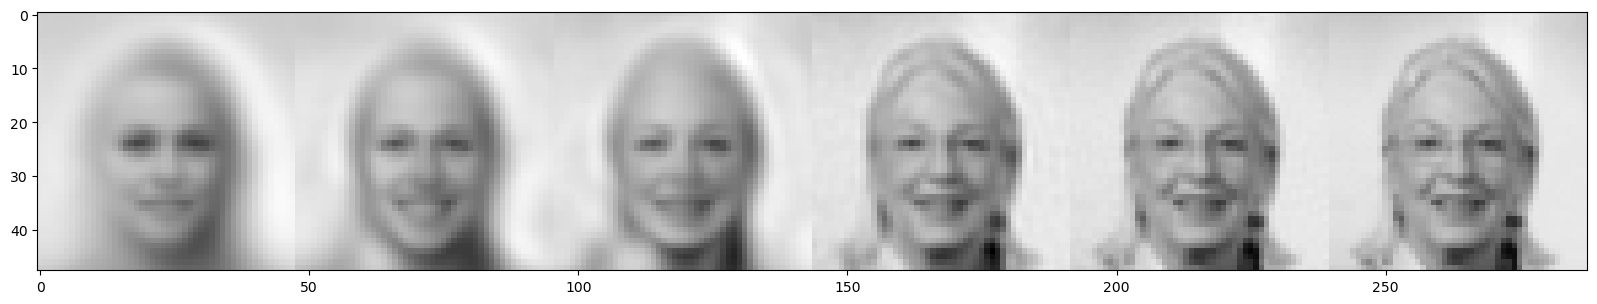

In [43]:
# Select a few examples to view
# Each value is the number of components used in the recostruction
imgs_indx = [10, 50, 100, 500, 1000, 2000]

# Reshape image stack to be one long row
img_to_view = img_all[imgs_indx].reshape(-1, image_size, image_size).transpose(1, 0, 2).reshape(image_size, -1)

# Plot images
_ = plt.figure(figsize=(20, 10))
_ = plt.imshow(img_to_view, cmap='gray')

## Generate Faces
What happens when we randomly sample the vector that defines the scale of the components of the face?

In [44]:
# Randomly sample a vector of values from a standard normal distribution 
random_sample = np.random.randn(1, image_size * image_size)

# Re-scale the values based on the values from the real faces
random_sample = (random_sample * U.std(0, keepdims=True)) + U.mean(0, keepdims=True)

# Construct a face with these values
img_eg = random_sample @ np.diag(S) @ Vh

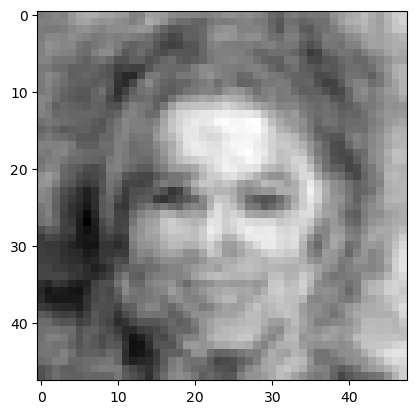

In [45]:
_ = plt.imshow(img_eg.reshape(image_size, image_size), cmap='gray')